In [1]:
import os
from chess import pgn
from IPython.display import display, clear_output

import chess
import numpy as np
from tqdm.notebook import tqdm
import tensorflow as tf

In [56]:
from stockfish import Stockfish
fishyboi = "/Users/henrywang/Downloads/stockfish/stockfish-macos-m1-apple-silicon"

def eval(board, depth, white = True):
    #White eval
    #Negative is bad
    with chess.engine.SimpleEngine.popen_uci(fishyboi) as sf:
        result = sf.analyse(board, chess.engine.Limit(depth = depth))
        # if white:
        #     # score = result['score'].white().score()
        # else:
        score = result['score'].black().score()

        return score


In [103]:
def convertToTensor(board):
    newBoard = board.copy()
    array3d = np.zeros((14, 8, 8))
    for piece in chess.PIECE_TYPES:
        for square in newBoard.pieces(piece, chess.WHITE):
            col = square % 8
            row = square // 8 
            array3d[piece - 1, col, row] = 1
        for square in newBoard.pieces(piece, chess.BLACK):
            col = square % 8
            row = square // 8 
            array3d[piece - 1 + 6, col, row] = 1
        aux = newBoard.turn
        newBoard.turn = chess.WHITE
        for move in newBoard.legal_moves:
            a = (move.to_square)
            col = a % 8
            row = a // 8 
            array3d[12, col, row] = 1
        newBoard.turn = chess.BLACK
        for move in newBoard.legal_moves:
            a = (move.to_square)
            col = a % 8
            row = a // 8 
            array3d[13, col, row] = 1
    return array3d

In [208]:
def checkValid(array):
    for i in range(14):
        for b in range(8):
            for c in range(8):
                if not (array[i][b][c] == 0 or array[i][b][c] == 1):
                    return False
    return True


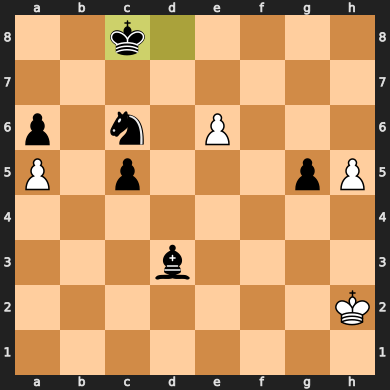

array([[[0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [223]:
r = random_board()
display(r)
b = convertToTensor(r)
b

In [338]:
games = []
count = 0
pgn_file = open("/Users/henrywang/Documents/chessEngine/dataset/lichess_elite_2023-08.pgn", encoding="utf-8")

for i in range(100):
    game = pgn.read_game(pgn_file)
    if game is None:
        break
    games.append(game)
    count += 1
print(len(games))


100


In [316]:


games = []
count = 0
pgn_file = open("/Users/henrywang/Documents/chessEngine/dataset/lichess_db_standard_rated_2013-02.pgn.zst", encoding="utf-8")

for i in range(100):
    game = pgn.read_game(pgn_file)
    if game is None:
        break
    games.append(game)
    count += 1
print(len(games))


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 13: invalid start byte

In [357]:
import random
def random_board(max_length = 200):
    board = chess.Board()
    depth = random.randrange(0, max_length)

    for _ in range(depth):
        board.push(random.choice(list(board.legal_moves)))
        if board.is_game_over():
            return None
    return board

715
hi


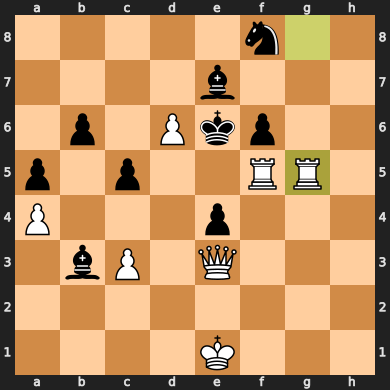

In [27]:
r = random_board()
print(eval(r, 20))
print("hi")
display(r)

In [258]:
x_data = []
y_data = []

In [259]:
for game in (games):
    board = game.board()
    for move in tqdm(game.mainline_moves()):
        x_data.append(convertToTensor(board))
        board.push(move)
        y_data.append(eval(board, 0))


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [358]:
random_x = []
random_y = []
for i in tqdm(range(1000)):
    r = random_board()
    if (r == None):
        continue
    else:
        random_x.append(convertToTensor(r))
        random_y.append(eval(r, 0))



  0%|          | 0/1000 [00:00<?, ?it/s]

In [378]:
random_x[0]

array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [387]:
random_x_array.shape

(957, 14, 8, 8)

In [365]:
indices = []
for i in range(len(random_x_array)):
    if np.isnan(random_y_array[i]):
        indices.append(i)


In [388]:
print(len(indices))

15


In [392]:
filteredRandomY = np.delete(random_y_array, indices)


filteredRandomX = np.delete(random_x_array, indices, axis = 0)

-513.0

In [344]:
print(game[0].next())

1... Nf6 2. Bg5 e6 3. e3 b6 4. Qf3 d5 5. Nd2 Be7 6. O-O-O Bb7 7. Bd3 Nbd7 8. Qh3 Ne4 9. Bxe7 Qxe7 10. Bxe4 dxe4 11. Ne2 O-O-O 12. Nc3 f5 13. g4 g6 14. gxf5 exf5 15. Rhg1 Kb8 16. Kb1 Nf6 17. Nc4 Ng4 18. Qg2 Qe6 19. b3 Ba6 20. Nb2 Qc6 21. Nca4 Be2 22. Rc1 Bf3 23. Qg3 Nf6 24. c4 Qd6 25. Qh4 Rhf8 26. c5 Qe6 27. cxb6 axb6 28. Nc4 Nd5 29. Ne5 Kb7 30. Qxh7 Rh8 31. Qxg6 Qxg6 32. Rxg6 Rxh2 33. Nc3 Nxc3+ 34. Rxc3 Rxf2 35. Rg7 Rc8 36. Nc4 Kb8 37. a4 Re2 38. a5 bxa5 39. Nxa5 Re1+ 40. Kb2 Be2 41. Ka3 Bd3 42. Kb4 Rxe3 43. Nc6+ Kb7 44. Ne7 Rb8 45. Nd5 Re1 46. Rgxc7+ Ka6+ 47. Kc5 Rb5+ 48. Kd6 Rb1 49. b4 R1xb4 50. Ra3+ Ra5 51. Nxb4+ Kb5 52. Rxa5+ Kxa5 53. Ke5 Bb5 54. Nc2 Ka4 55. Ne3 Bd3 56. Kf4 Bc2 57. Rf7 Bd3 58. Rxf5 Kb3 59. Re5 Kc3 60. Rxe4 Bxe4 61. Kxe4 Kb4 62. Ke5 Kb5 63. d5 Kb6 64. Ke6 Kb5 65. Ke7 Kb4 66. d6 Kc3 67. d7 Kb3 68. Nd5 Kc4 69. Nf6 Kc3 70. d8=Q Kc2 71. Qd7 Kb2 72. Qe6 Kb1 73. Nd5 Ka1 74. Nb6 Kb1 75. Qc4 Kb2 76. Qb5+ Ka2 77. Nc4 Ka1 78. Qb2#


In [10]:
import keras
from keras import layers

In [427]:
boardInput = layers.Input(shape = (14, 8, 8))
conv = layers.Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = "relu")(boardInput)

x = layers.BatchNormalization()(conv)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = "relu")(x)
x = layers.Add()([x, boardInput])
x = layers.Activation('relu')(x)

for _ in range(2):
    previous = x
    x = layers.Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = "relu")(x)
    x = layers.Add()([x, previous])
    x = layers.Activation('relu')(x)

x = layers.Flatten()(x)
x = layers.Dense(16, activation = "relu")(x)
finalOutput = layers.Dense(1)(x)

model = keras.models.Model(inputs = boardInput, outputs = finalOutput)
model.compile(optimizer = keras.optimizers.legacy.Adam(learning_rate = 0.0001), loss = "mean_squared_error")

In [425]:
print(model.summary())

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_38 (InputLayer)       [(None, 14, 8, 8)]           0         []                            
                                                                                                  
 conv2d_198 (Conv2D)         (None, 14, 8, 8)             584       ['input_38[0][0]']            
                                                                                                  
 batch_normalization_85 (Ba  (None, 14, 8, 8)             32        ['conv2d_198[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_164 (Activation  (None, 14, 8, 8)             0         ['batch_normalization_8

In [261]:
print(len(y_data))
print(len(x_data))

8974
8974


In [262]:
y_array = np.asarray(y_data).astype('float32')
x_array = np.asarray(x_data).astype('float32')

In [ ]:
import numpy as np

In [306]:


np.save('nnInput/x_data.npy', x_array)


In [271]:
print(len(y_array))
print(len(x_array))

y_array[np.isnan(y_array)] = 0

print(y_array)




8974
8974
[ -25.   -3.  -32. ... -603.    0.    0.]


False

In [324]:
# win_list = [(50 + 50 * (2 / (1 + np.exp(-0.00368208 * centipawns)) - 1)) for centipawns in y_array]
# win_array = np.asarray(win_list)

In [310]:
x_array = np.load("nnInput/x_data.npy")

In [331]:
clippedY_array = np.clip(y_array, -1500, 1500)


-1146.0


In [362]:
np.isnan(random_y_array)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [376]:
print(x_array.shape)
print(filteredRandomX.shape)

(8974, 14, 8, 8)
(857457,)


In [373]:
actualY = np.concatenate((y_array, filteredRandomY))
actualX = np.concatenate((x_array, filteredRandomX))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 1 dimension(s)

In [428]:
history = model.fit(x_array, y_array, epochs = 200, validation_split = 0.2)

Epoch 1/200
225/225 [==============================] - 6s 21ms/step - loss: 48313.4023 - val_loss: 48302.3203
Epoch 2/200
225/225 [==============================] - 3s 14ms/step - loss: 47601.7188 - val_loss: 47555.7422
Epoch 3/200
225/225 [==============================] - 3s 14ms/step - loss: 46969.5117 - val_loss: 46554.3633
Epoch 4/200
225/225 [==============================] - 4s 16ms/step - loss: 45773.8242 - val_loss: 45111.5586
Epoch 5/200
225/225 [==============================] - 4s 16ms/step - loss: 43995.6953 - val_loss: 43324.6484
Epoch 6/200
225/225 [==============================] - 3s 14ms/step - loss: 42134.9297 - val_loss: 41385.6133
Epoch 7/200
225/225 [==============================] - 3s 14ms/step - loss: 40501.7891 - val_loss: 40218.0859
Epoch 8/200
225/225 [==============================] - 3s 13ms/step - loss: 39394.8477 - val_loss: 39061.3203
Epoch 9/200
225/225 [==============================] - 3s 14ms/step - loss: 37962.5117 - val_loss: 39021.4062
Epoch 10/2

False

1/1 [==============================] - 0s 19ms/step


array([[-17.857069]], dtype=float32)

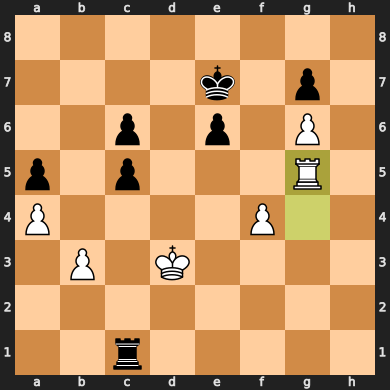

array([[[0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [393]:
board = game.board()
count = 0
for move in (games[0].mainline_moves()):
    clear_output()
    board.push(move)
    display(board)
    if (count == 70):
        break
    

    count+=1


sample = convertToTensor(board)
sample

In [413]:
model.predict(x_array)

281/281 [==============================] - 2s 5ms/step


array([[-0.15711342],
       [-0.35450658],
       [-0.6845356 ],
       ...,
       [ 0.2813118 ],
       [ 0.6835934 ],
       [ 0.563727  ]], dtype=float32)

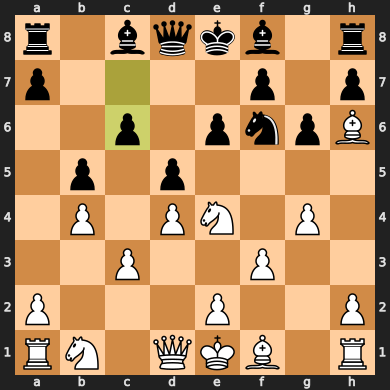

1/1 [==============================] - 0s 28ms/step
[[0.28430906]]
-359


In [412]:
r = random_board()
display(r)
b = convertToTensor(r)

print(model.predict(np.expand_dims(b, axis=0)))
print(eval(r, 20))

In [185]:
eval(b, 0)

478

In [165]:
import matplotlib.pyplot as plt

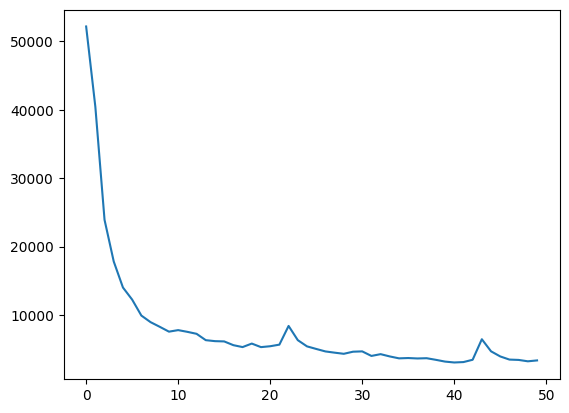

In [167]:
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')